# Modelo classificatorio com Arvore de decisão

In [1]:
from sklearn.model_selection import train_test_split
import os
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import StandardScaler # Árvores de Decisão geralmente não precisam, mas pode ser útil para comparar
import matplotlib.pyplot as plt

## Download do data set via kaggle

In [5]:
import kagglehub # Para download de datasets do kaggle
import os

# Download do dataset do alfabeto em libras
path = kagglehub.dataset_download("grassknoted/asl-alphabet")
print ("Download feito em: ", path)

# Imprimindo arvore de diretorios do dataset 
for root, dirs, _ in os.walk(path):
    level = root.replace(path, '').count(os.sep)
    indent = ' ' * 4 * level
    print(f"{indent}[DIR] {os.path.basename(root)}")

100%|██████████████████████████████████████| 1.03G/1.03G [01:39<00:00, 11.1MB/s]

Extracting files...


Download feito em:  /home/fernando/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1
[DIR] 1
    [DIR] asl_alphabet_test
        [DIR] asl_alphabet_test
    [DIR] asl_alphabet_train
        [DIR] asl_alphabet_train
            [DIR] F
            [DIR] U
            [DIR] D
            [DIR] A
            [DIR] W
            [DIR] G
            [DIR] K
            [DIR] space
            [DIR] X
            [DIR] J
            [DIR] P
            [DIR] C
            [DIR] Z
            [DIR] I
            [DIR] R
            [DIR] N
            [DIR] E
            [DIR] Q
            [DIR] del
            [DIR] Y
            [DIR] T
            [DIR] V
            [DIR] S
            [DIR] B
            [DIR] nothing
            [DIR] M
            [DIR] H
            [DIR] L
            [DIR] O


## Extração de caracteristicas com LBP

In [6]:
import glob
import numpy as np
from lbp import lbp
import skimage

dirs = [
    'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 
    'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del'
]

X = []
Y = []

for dir in dirs:
    path_dir = (path + "/asl_alphabet_train/asl_alphabet_train/" + dir + '/')
    print(f"Caminho completo: {path_dir}")
    
    for filename in glob.glob(f"{path_dir}*.jpg"):
        img = skimage.io.imread(filename, as_gray=True)
        img *= 255
        img = img.astype(np.uint8)
        features = lbp(img)
        X.append(features.flatten())   
        Y.append(dir)                  

X = np.array(X)
Y = np.array(Y)

Caminho completo: /home/fernando/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/asl_alphabet_train/A/
Caminho completo: /home/fernando/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/asl_alphabet_train/B/
Caminho completo: /home/fernando/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/asl_alphabet_train/C/
Caminho completo: /home/fernando/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/asl_alphabet_train/D/
Caminho completo: /home/fernando/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/asl_alphabet_train/E/
Caminho completo: /home/fernando/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/asl_alphabet_train/F/
Caminho completo: /home/fernando/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/asl_alphabet_train/G/
Caminho completo: /home/fernando/.cache/kagglehu

## Treinos já salvos

In [2]:
X_treino = np.load(os.path.join('X_treino2.npy'), allow_pickle=True)
y_treino = np.load(os.path.join('y_treino2.npy'))
X_teste = np.load(os.path.join('X_teste2.npy'), allow_pickle=True)
y_teste = np.load(os.path.join('y_teste2.npy'))

## Validação cruzada 

In [10]:
# Validação cruzada
X_treino, X_teste, y_treino, y_teste = train_test_split(X, Y, test_size=0.2, random_state=99, stratify=Y)

In [3]:
# Tamanho dos arquivos
print("Tamanho Xtreino ", X_treino.shape)
print("Tamanho Xteste ", y_treino.shape)
print("Tamanho Ytreino ", X_teste.shape)
print("Tamanho Yteste ", y_teste.shape)

Tamanho Xtreino  (64800, 59)
Tamanho Xteste  (64800,)
Tamanho Ytreino  (16200, 59)
Tamanho Yteste  (16200,)


In [13]:
np.save("X_treino2", X_treino)
np.save("X_teste2", X_teste)
np.save("y_treino2", y_treino)
np.save("y_teste2", y_teste)

## Otimização de hiperparametros 

In [16]:
# otimização de hiperparemtros
# Fazendo uma otimização de hiperrametros
min_leafs = [3, 5, 10, 15, 20, 30] #i
min_splits = [2, 4, 8, 16, 32, 40] #j
max_dephts = [None, 2, 3, 4, 5] #k
acuracia = 0
for i in min_leafs:
    for j in min_splits:
        for k in max_dephts:
            ad = DecisionTreeClassifier(min_samples_leaf=i, min_samples_split= j,max_depth=k)
            ad.fit(X_treino, y_treino)
            pred = ad.predict(X_teste)
            if acuracia < accuracy_score(y_teste, pred):
                acuracia = accuracy_score(y_teste, pred)
                leaf = i
                split = j
                depth = k
                predFinal = pred
                melhor_ad = ad
print("Melhor combinação de parametros")
print(f"DecisionTreeClassifier(min_samples_leaf={leaf}, min_samples_split={split},max_depth={depth})")
print("A acurácia no conjunto de testes: %.2f" % acuracia)
print(classification_report(y_teste, predFinal))

Melhor combinação de parametros
DecisionTreeClassifier(min_samples_leaf=3, min_samples_split=2,max_depth=None)
A acurácia no conjunto de testes: 0.77
              precision    recall  f1-score   support

           A       0.69      0.73      0.71       600
           B       0.72      0.77      0.74       600
           C       0.86      0.88      0.87       600
           D       0.79      0.80      0.80       600
           E       0.71      0.73      0.72       600
           F       0.80      0.78      0.79       600
           G       0.86      0.88      0.87       600
           H       0.87      0.86      0.86       600
           I       0.78      0.79      0.78       600
           J       0.84      0.87      0.86       600
           K       0.88      0.85      0.86       600
           L       0.81      0.84      0.83       600
           M       0.77      0.80      0.79       600
           N       0.78      0.79      0.79       600
           O       0.76      0.73      

## Matriz de confusão - Modelo com Hiperparametros 

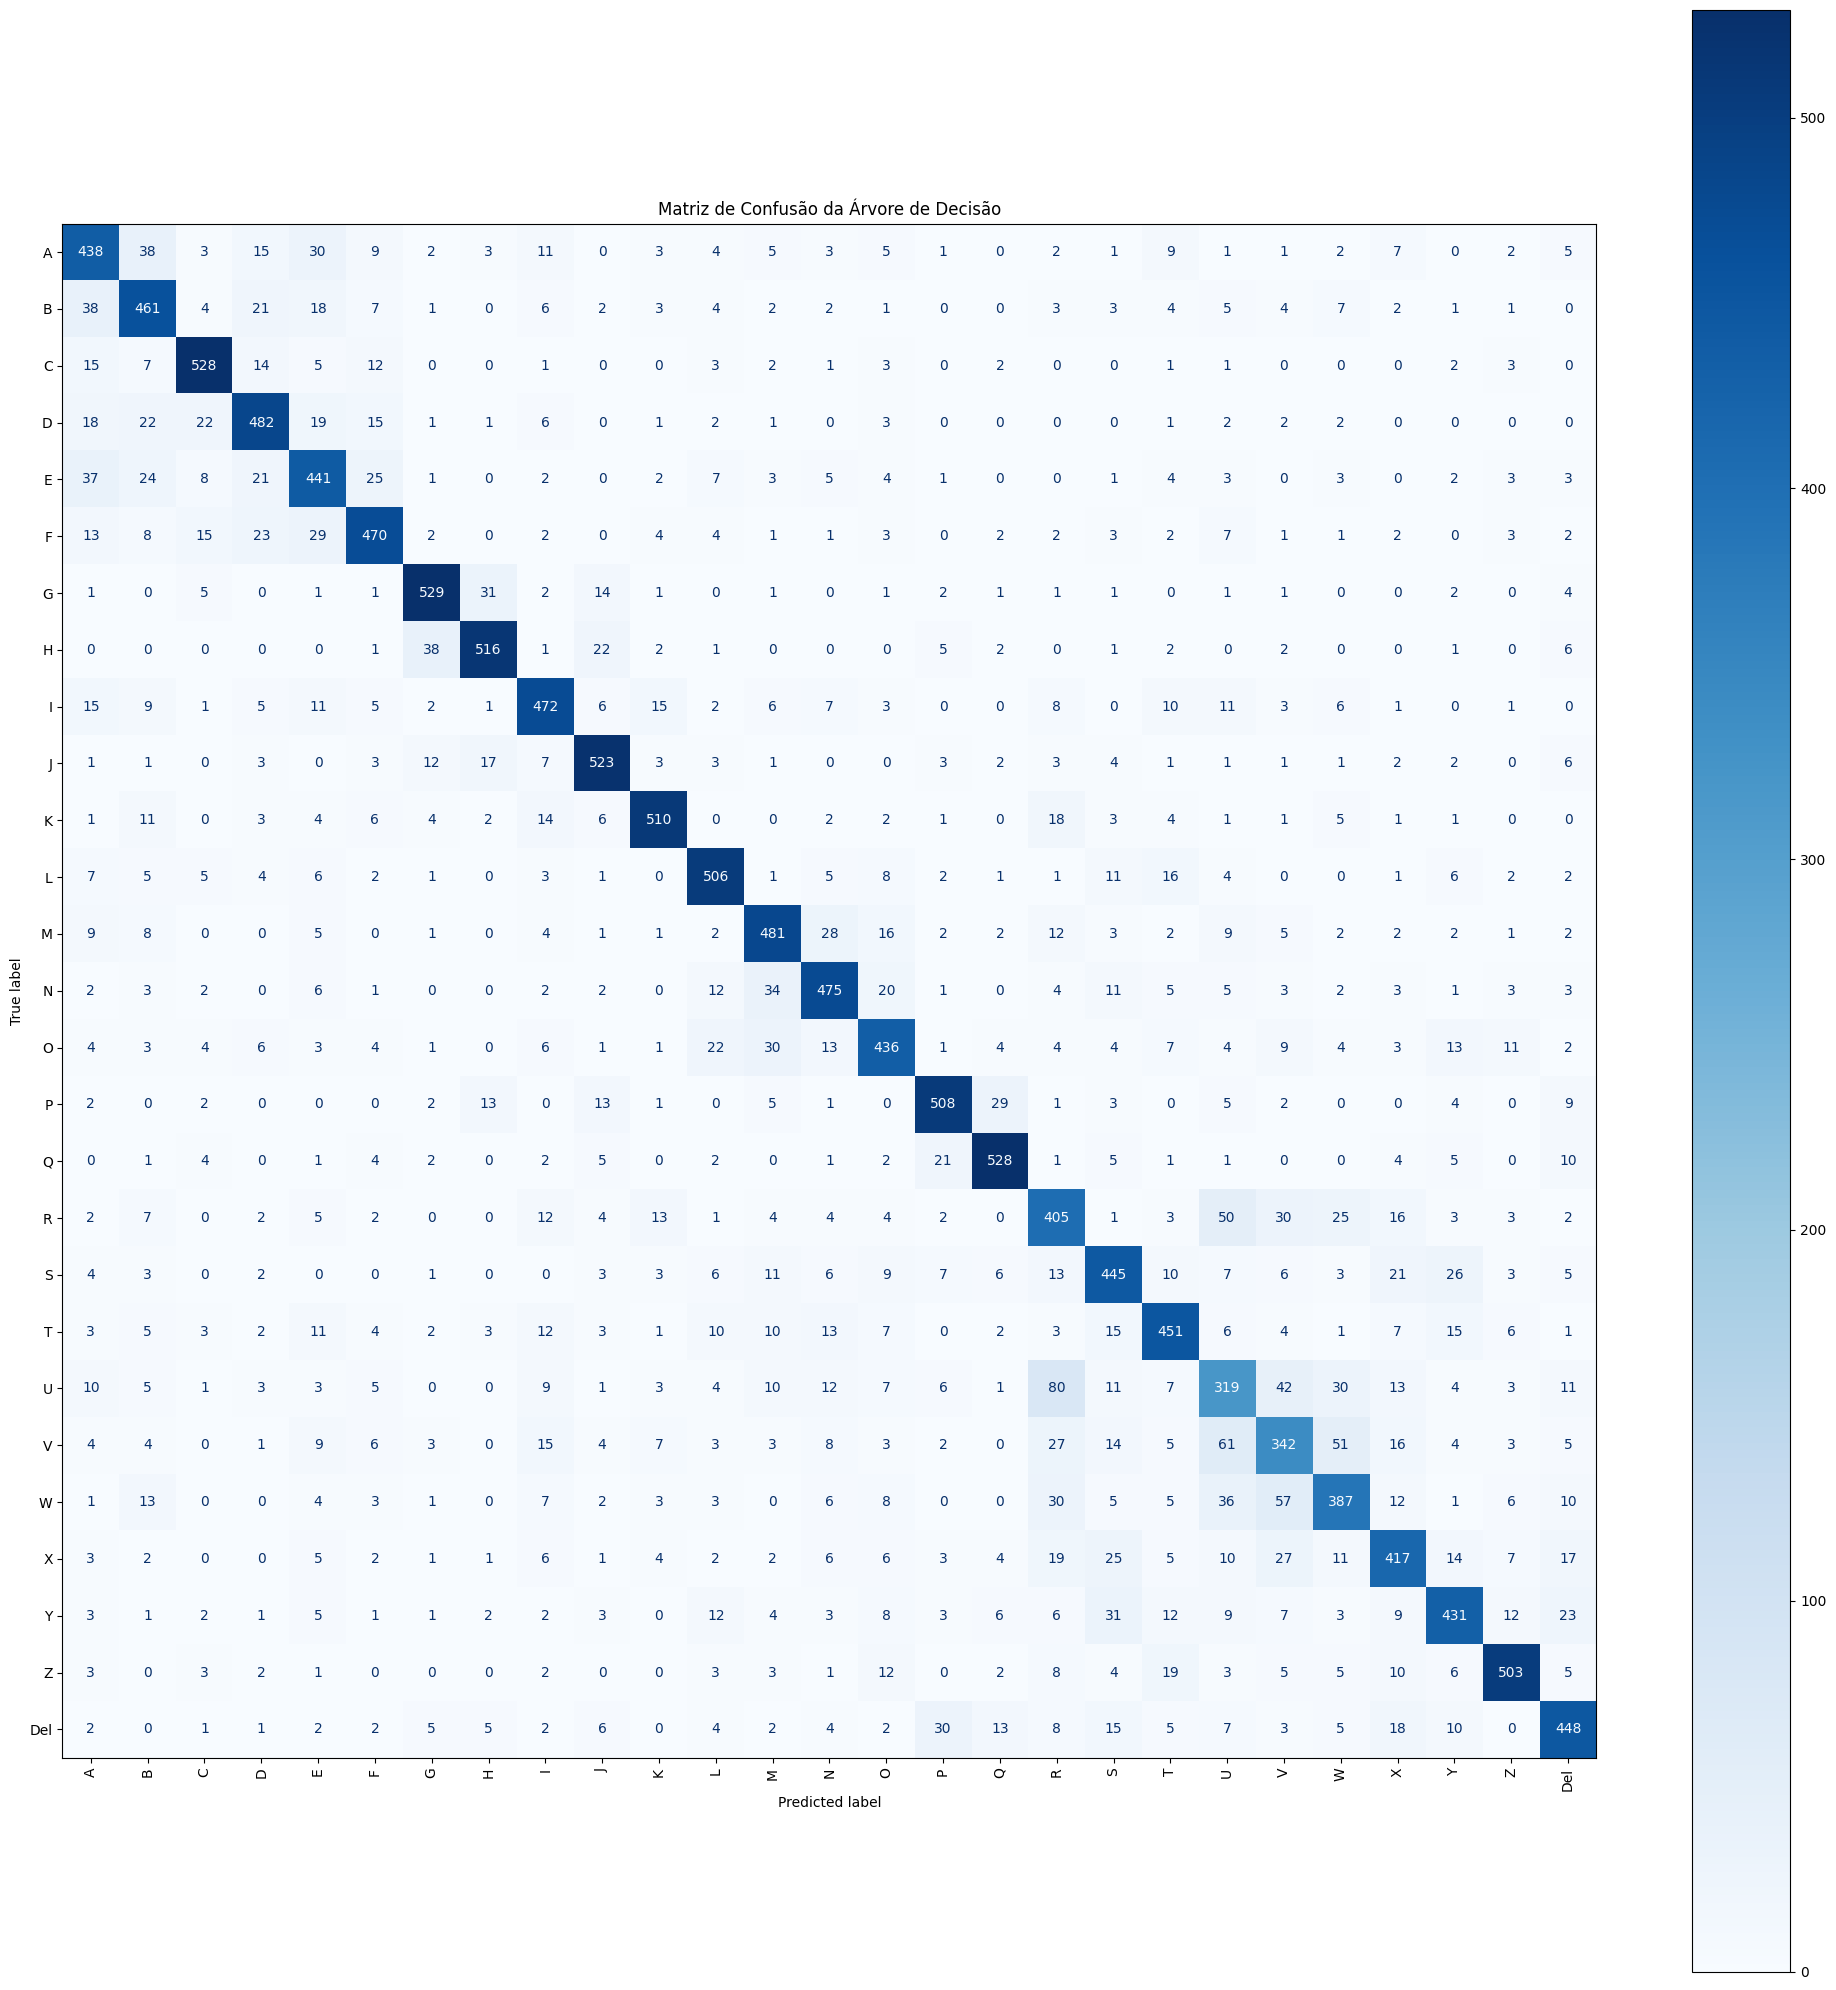

In [17]:
num_to_label = {}
current_label_id = 0

# Mapear letras (A-Z) para labels numéricas e vice-versa
for char_code in range(ord('A'), ord('Z') + 1):
    char = chr(char_code)
    num_to_label[current_label_id] = char.upper() # Usar upper() para exibição
    current_label_id += 1

# Mapear as classes especiais para labels numéricas e vice-versa
special_classes = ['del']
for special_class in special_classes:
    num_to_label[current_label_id] = special_class.capitalize() # Capitalizar para exibição (Nothing, Space, Del)
    current_label_id += 1

class_labels_sorted = [num_to_label[i] for i in sorted(num_to_label.keys())]

fig, ax = plt.subplots(figsize=(20, 20)) # Ajuste o tamanho conforme necessário

disp_dt = ConfusionMatrixDisplay.from_estimator(
    melhor_ad,
    X_teste,
    y_teste,
    cmap=plt.cm.Blues,
    display_labels=class_labels_sorted,
    xticks_rotation='vertical',         # Rotaciona os rótulos do eixo X para melhor legibilidade
    ax=ax                               # Passa o eixo para que possamos controlar o tamanho da figura
)
disp_dt.ax_.set_title("Matriz de Confusão da Árvore de Decisão")
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.savefig(fname="Matrix-ArvoreDecisao.png")
plt.show()

## Modelo sem otimização de parametros

In [6]:
#Sem otimização
# Crie a instância do classificador de Árvore de Decisão
ad = DecisionTreeClassifier()
# Fazer treino
ad.fit(X_treino, y_treino)
# Teste
pred = ad.predict(X_teste)
#Calculo de acuracia
ac = accuracy_score(y_teste, pred)
print("Acuracia sem otimização de parametros: %.2f" % ac)
print(classification_report(y_teste, pred))

Acuracia sem otimização de parametros: 0.77
              precision    recall  f1-score   support

           A       0.73      0.73      0.73       600
           B       0.74      0.77      0.75       600
           C       0.89      0.88      0.88       600
           D       0.79      0.80      0.80       600
           E       0.73      0.75      0.74       600
           F       0.82      0.80      0.81       600
           G       0.87      0.89      0.88       600
           H       0.89      0.86      0.88       600
           I       0.78      0.79      0.78       600
           J       0.88      0.89      0.88       600
           K       0.86      0.84      0.85       600
           L       0.81      0.82      0.82       600
           M       0.79      0.79      0.79       600
           N       0.77      0.79      0.78       600
           O       0.78      0.73      0.76       600
           P       0.83      0.83      0.83       600
           Q       0.86      0.87    

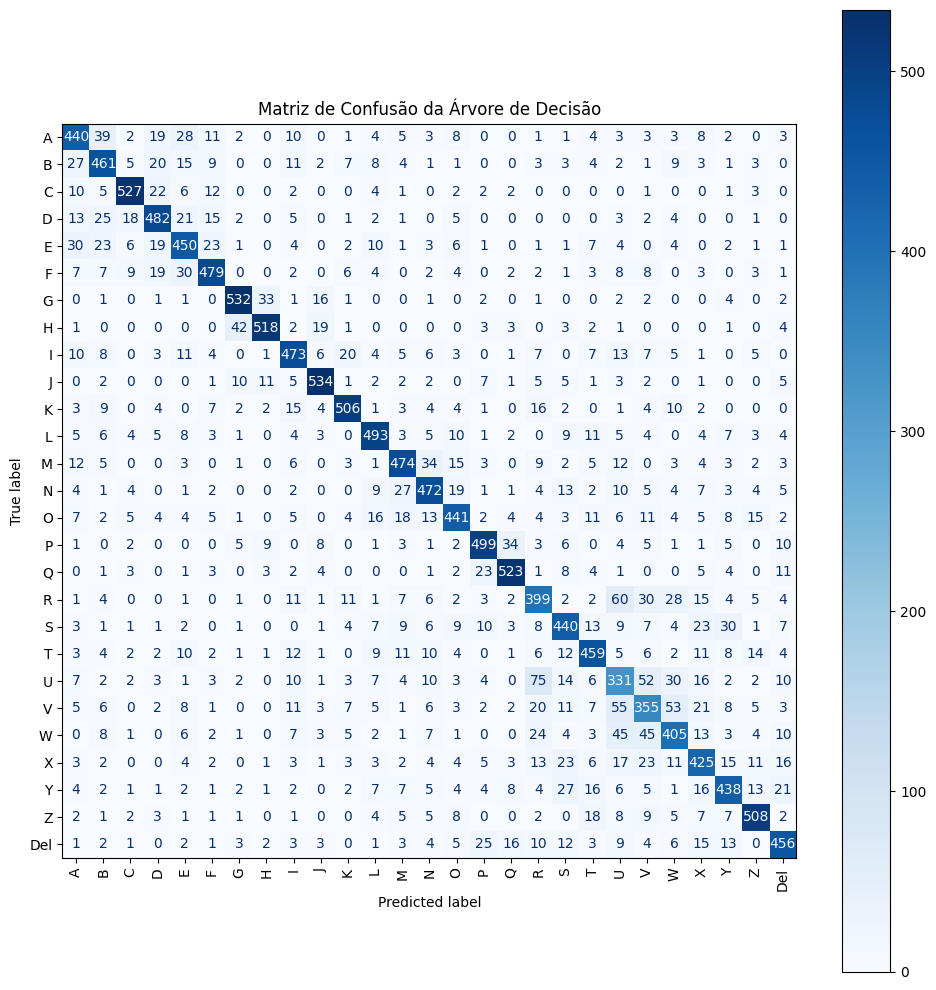

In [9]:
num_to_label = {}
current_label_id = 0

# Mapear letras (A-Z) para labels numéricas e vice-versa
for char_code in range(ord('A'), ord('Z') + 1):
    char = chr(char_code)
    num_to_label[current_label_id] = char.upper() # Usar upper() para exibição
    current_label_id += 1

# Mapear as classes especiais para labels numéricas e vice-versa
special_classes = ['del']
for special_class in special_classes:
    num_to_label[current_label_id] = special_class.capitalize() # Capitalizar para exibição (Nothing, Space, Del)
    current_label_id += 1

class_labels_sorted = [num_to_label[i] for i in sorted(num_to_label.keys())]

fig, ax = plt.subplots(figsize=(10, 10)) # Ajuste o tamanho conforme necessário

disp_dt = ConfusionMatrixDisplay.from_estimator(
    ad,
    X_teste,
    y_teste,
    cmap=plt.cm.Blues,
    display_labels=class_labels_sorted,
    xticks_rotation='vertical',         # Rotaciona os rótulos do eixo X para melhor legibilidade
    ax=ax                               # Passa o eixo para que possamos controlar o tamanho da figura
)
disp_dt.ax_.set_title("Matriz de Confusão da Árvore de Decisão")
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.savefig(fname="Matrix-ArvoreDecisaosemOtimizacao.png")
plt.show()

## Pior combinação de parametros

In [21]:
# pior combinação de parametros
min_leafs = [3, 5, 10, 15, 20, 30] #i
min_splits = [2, 4, 8, 16, 32, 40] #j
max_dephts = [None, 2, 3, 4, 5] #k
for i in min_leafs:
    for j in min_splits:
        for k in max_dephts:
            ad = DecisionTreeClassifier(min_samples_leaf=i, min_samples_split= j,max_depth=k)
            ad.fit(X_treino, y_treino)
            pred = ad.predict(X_teste)
            if ac > accuracy_score(y_teste, pred):
                ac = accuracy_score(y_teste, pred)
                leaf = i
                split = j
                depth = k
                predFinal = pred
                melhor_ad = ad
print("Pior combinação de parametros")
print(f"DecisionTreeClassifier(min_samples_leaf={leaf}, min_samples_split={split},max_depth={depth})")
print("A acurácia no conjunto de testes: %.2f" % acuracia)
print(classification_report(y_teste, predFinal))

Pior combinação de parametros
DecisionTreeClassifier(min_samples_leaf=3, min_samples_split=2,max_depth=2)
A acurácia no conjunto de testes: 0.77
              precision    recall  f1-score   support

           A       0.00      0.00      0.00       600
           B       0.00      0.00      0.00       600
           C       0.08      0.94      0.16       600
           D       0.00      0.00      0.00       600
           E       0.00      0.00      0.00       600
           F       0.00      0.00      0.00       600
           G       0.15      0.79      0.25       600
           H       0.00      0.00      0.00       600
           I       0.00      0.00      0.00       600
           J       0.00      0.00      0.00       600
           K       0.00      0.00      0.00       600
           L       0.00      0.00      0.00       600
           M       0.08      0.74      0.14       600
           N       0.00      0.00      0.00       600
           O       0.00      0.00      0.00 

/home/fernando/Área de trabalho/IA/my_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/fernando/Área de trabalho/IA/my_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/fernando/Área de trabalho/IA/my_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier